# Principal Component Analysis

## import library

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from sympy import Symbol,solve

## load data

In [99]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

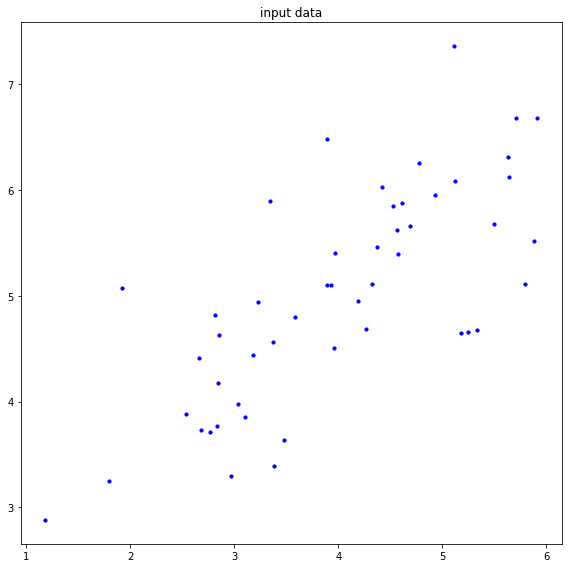

In [100]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y,s = 10, c = 'b')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

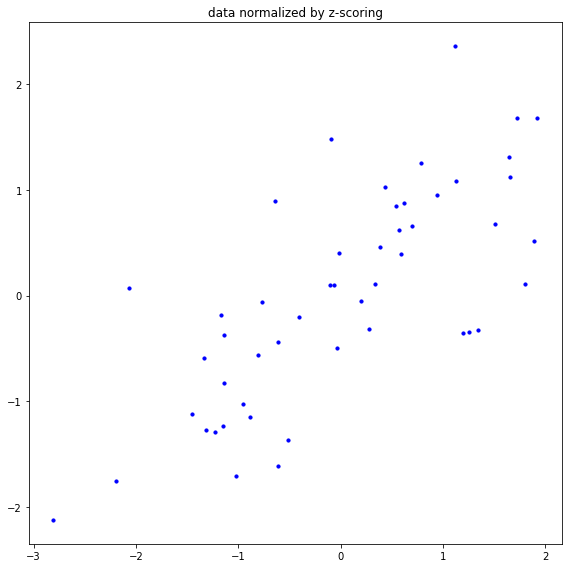

In [101]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
sumx = 0;
sumy = 0;
for i in range(number_data):
    sumx += x[i]
    sumy += y[i]
    
avgx = sumx / number_data
avgy = sumy / number_data

z_scoring_data = np.zeros((number_data,number_feature))

for i in range(number_data):
    z_scoring_data[i][0] = x[i] - avgx
    z_scoring_data[i][1] = y[i] - avgy

temp = z_scoring_data.T

plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## compute covariance matrix

In [102]:
def compute_covariance(feature):
    Z = feature
    Z_T = Z.T
    Z_TmulZ = np.matmul(Z_T, Z)
    Sigma = Z_TmulZ / feature.shape[0]
    return Sigma

## compute principal directions

In [111]:
def compute_eigen(X):
    x = Symbol('x')
    y = Symbol('y')
    a = Symbol('a')
    b = Symbol('b')
    eq1 = a*x*x+b*y*y - X[0][0]
    eq2 = a*x*(1-x*x)**(1/2)+y*b*(1-y*y)**(1/2) - X[0][1]
    eq3 = a*x*(1-x*x)**(1/2)+y*b*(1-y*y)**(1/2) - X[1][0]
    eq4 = a*(1-x*x)+b*(1-y*y) - X[1][1]
    eq5 = x*y+((1-x*x)*(1-y*y))**(1/2)
    result = solve((eq1,eq2,eq3,eq4,eq5),dict = True)
    S = np.identity(n=2)
    U = X
    
    x = result[0][x]
    y = result[0][y]
    U[0][0] = x
    U[0][1] = y
    U[1][0] = sqrt(1-x**2)
    U[1][1] = sqrt(1-y**2)
    
    S[0][0] = result[0][a]
    S[1][1] = result[0][b] / 20
    
    return S, U

{a: 0.376811980346772, b: 42.9404356371132, x: -0.776709347404283, y: 0.629859182400965}
1.667611887047892


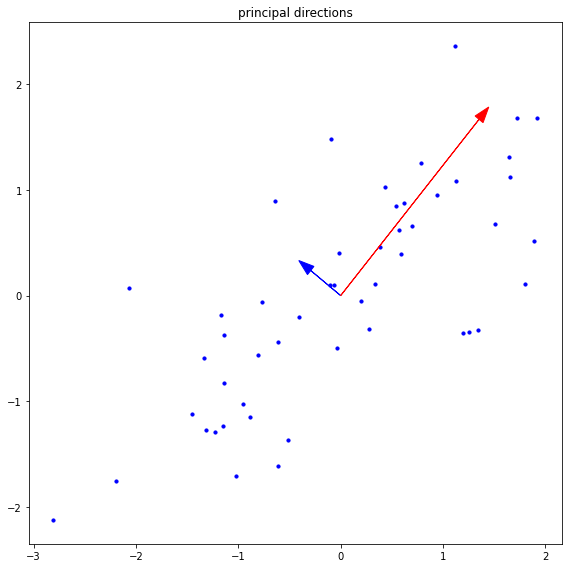

In [112]:
plt.figure(figsize=(8,8))
plt.title('principal directions')
X = compute_covariance(feature)
S, U = compute_eigen(X)
print(U[1][1]*S[1][1])
plt.arrow(0,0,U[0][0]*S[0][0],U[1][0]*S[0][0], head_width=0.1,color = 'blue')
plt.arrow(0,0,U[0][1]*S[1][1],U[1][1]*S[1][1], head_width=0.1,color = 'red')
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## first principal axis

-3.082869032898507
-2.9595542715825665
-2.8362395102666262
-2.712924748950686
-2.5896099876347454
-2.466295226318805
-2.3429804650028645
-2.2196657036869243
-2.096350942370984
-1.9730361810550434
-1.8497214197391032
-1.7264066584231628
-1.6030918971072223
-1.479777135791282
-1.3564623744753415
-1.2331476131594012
-1.1098328518434608
-0.9865180905275204
-0.8632033292115799
-0.7398885678956396
-0.6165738065796992
-0.4932590452637588
-0.3699442839478184
-0.24662952263187804
-0.12331476131593765
2.7381377457822494e-15
0.12331476131594313
0.2466295226318835
0.3699442839478239
0.4932590452637643
0.6165738065797047
0.739888567895645
0.8632033292115855
0.9865180905275258
1.1098328518434661
1.2331476131594066
1.356462374475347
1.4797771357912874
1.6030918971072279
1.726406658423168
1.8497214197391085
1.9730361810550485
2.0963509423709894
2.2196657036869305
2.3429804650028703
2.46629522631881
2.5896099876347507
2.712924748950692
2.8362395102666316
2.9595542715825713


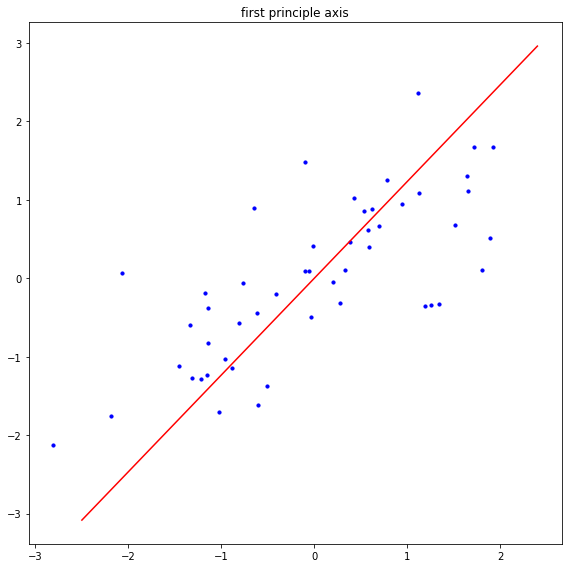

In [125]:
t = U[1][1] / U[0][1]
plt.figure(figsize=(8,8))

x = np.arange(-2.5,2.5,0.1)
f = np.zeros(len(x))
for i in range(len(x)):
    f[i]=t * x[i]
    print(f[i])
    
plt.title('first principle axis')
plt.plot(x, f, '-', color = 'red')
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## second principal axis

2.0273323106832613
1.9462390182559306
1.8651457258286002
1.7840524334012695
1.702959140973939
1.6218658485466084
1.540772556119278
1.4596792636919476
1.378585971264617
1.2974926788372865
1.216399386409956
1.1353060939826254
1.054212801555295
0.9731195091279644
0.8920262167006339
0.8109329242733033
0.7298396318459729
0.6487463394186423
0.5676530469913118
0.4865597545639813
0.4054664621366508
0.3243731697093203
0.24327987728198974
0.16218658485465923
0.08109329242732871
-1.8006328079096623e-15
-0.08109329242733232
-0.16218658485466284
-0.24327987728199335
-0.32437316970932384
-0.4054664621366544
-0.48655975456398487
-0.5676530469913154
-0.6487463394186459
-0.7298396318459764
-0.810932924273307
-0.8920262167006374
-0.973119509127968
-1.0542128015552985
-1.135306093982629
-1.2163993864099596
-1.2974926788372896
-1.3785859712646205
-1.4596792636919513
-1.5407725561192815
-1.6218658485466118
-1.7029591409739426
-1.7840524334012735
-1.8651457258286037
-1.9462390182559337


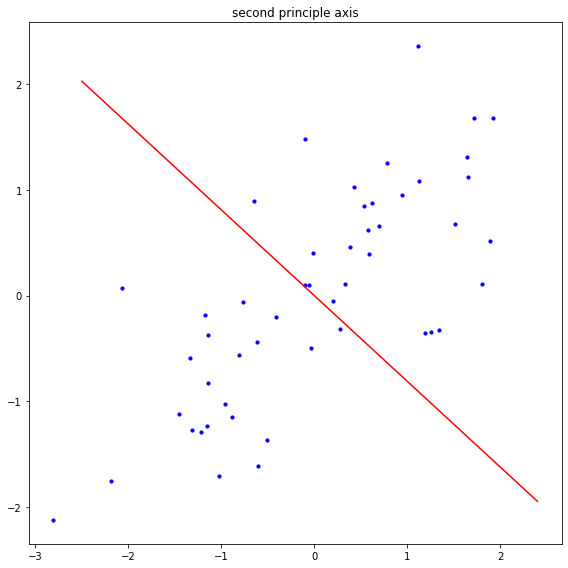

In [126]:
t = U[0][1] / U[0][0]
plt.figure(figsize=(8,8))
plt.title('second principle axis')
x = np.arange(-2.5,2.5,0.1)
f = np.zeros(len(x))
for i in range(len(x)):
    f[i]=t * x[i]
    print(f[i])
plt.plot(x, f, '-', color = 'red')
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [154]:
def compute_projection_onto_line(feature, vector):
    projection = np.zeros((feature.shape[0], 2))
    
    
    for i in range(feature.shape[0]):
        x = feature[i][0] * vector[0] + feature[i][1] * vector[1]
        y = vector[0]**2 +vector[1]**2
        projection[i] = vector * (x / y)
    return projection

## projcet to the first principal axis

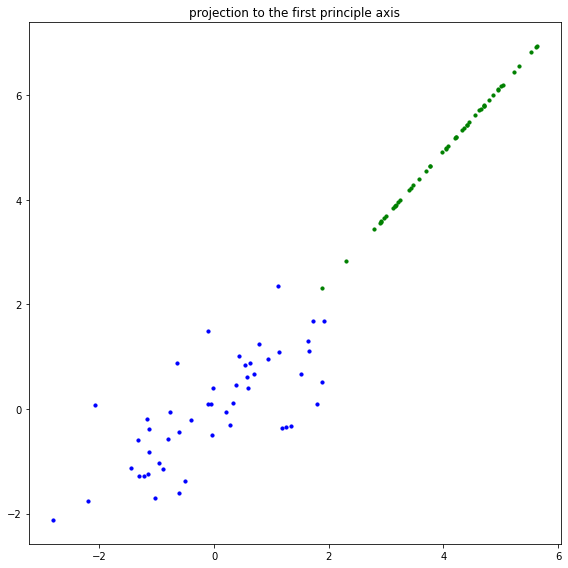

In [155]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
vector = np.zeros(2)
vector[0] = U[0][1]
vector[1] = U[1][1]
projection = compute_projection_onto_line(feature, vector)
projectionT= projection.T
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.scatter(projectionT[0],projectionT[1], s = 10, c = 'g')
plt.tight_layout()
plt.show()

## projcet to the second principal axis

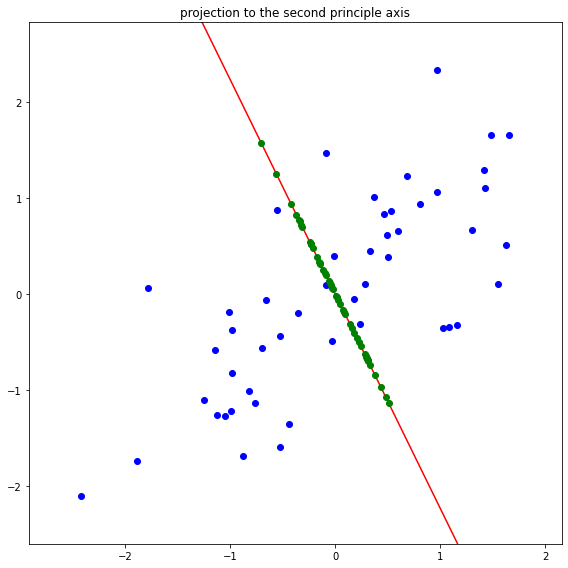

In [23]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
vector = np.zeros(2)
vector[0] = U[0][1]
vector[1] = U[1][1]
projection = compute_projection_onto_line(feature, vector)
projectionT= projection.T
plt.scatter(temp[0],temp[1], s = 10, c = 'b')
plt.scatter(projectionT[0],projectionT[1], s = 10, c = 'g')
plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

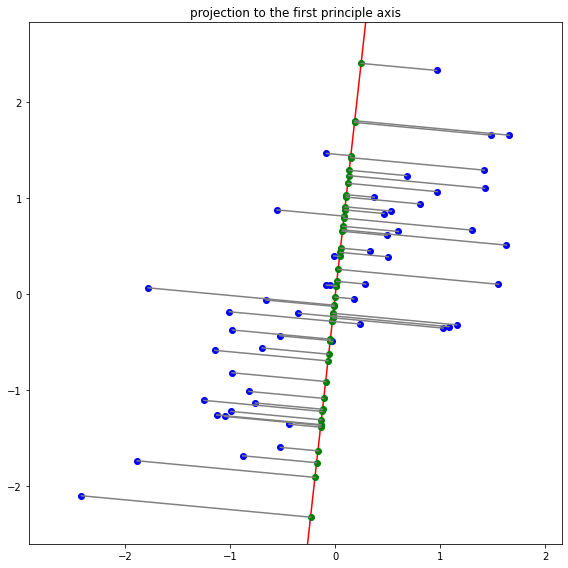

In [24]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

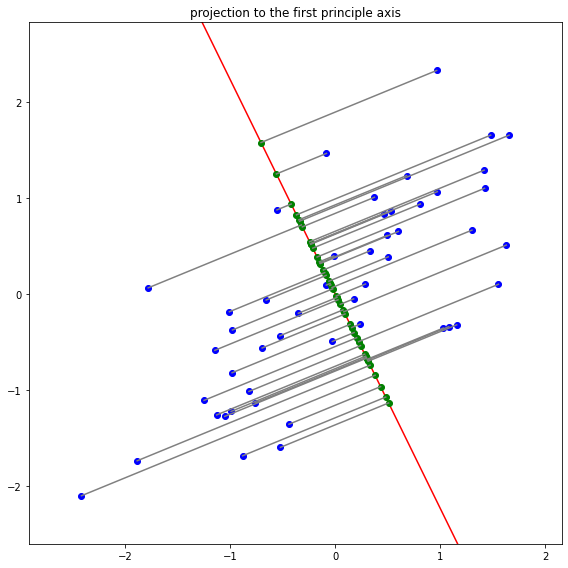

In [25]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

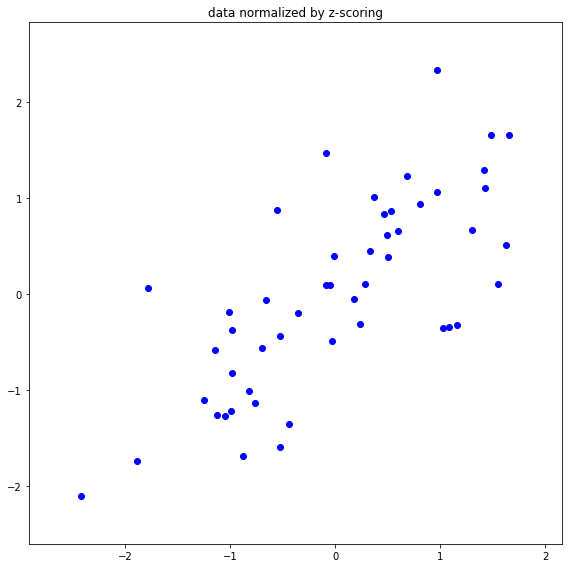

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

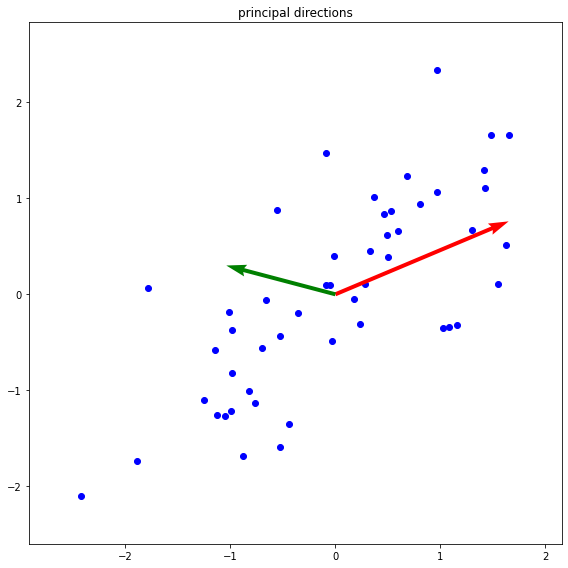

***

### 3. plot the first principal axis in red on the normalized data in blue

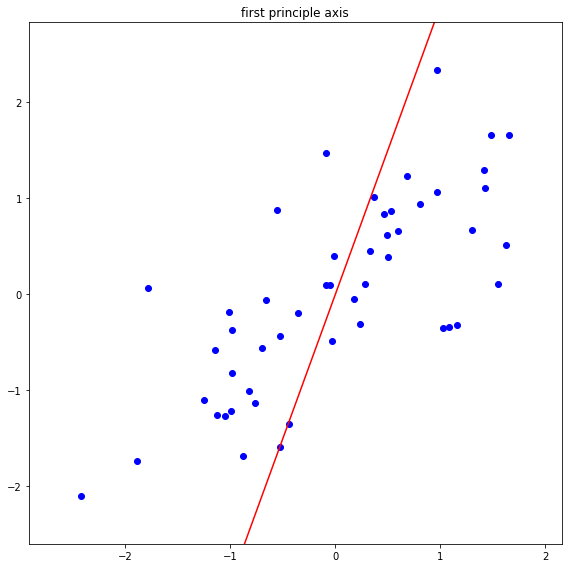

***

### 4. plot the second principal axis in red on the normalized data in blue

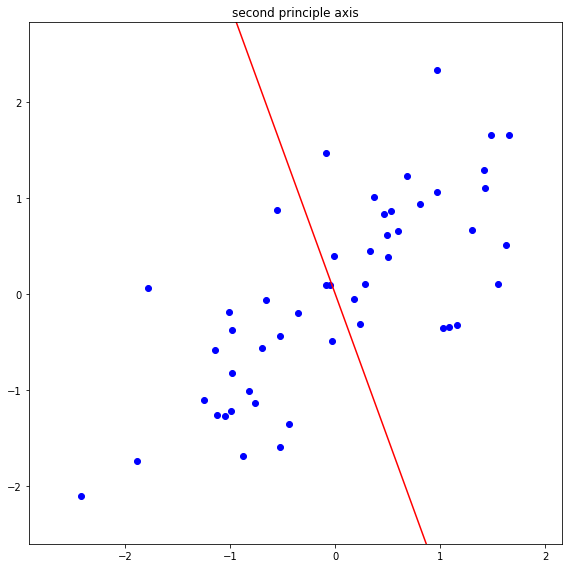

***

### 5. plot the projection of data in green onto the first principal axis in red

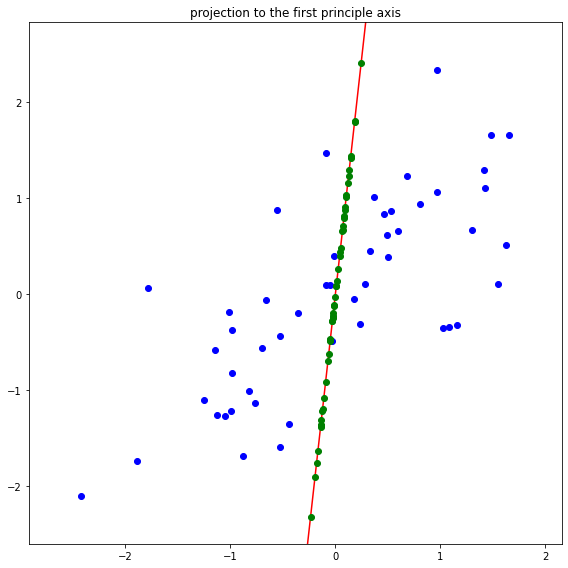

***

### 6. plot the projection of data in green onto the second principal axis in red

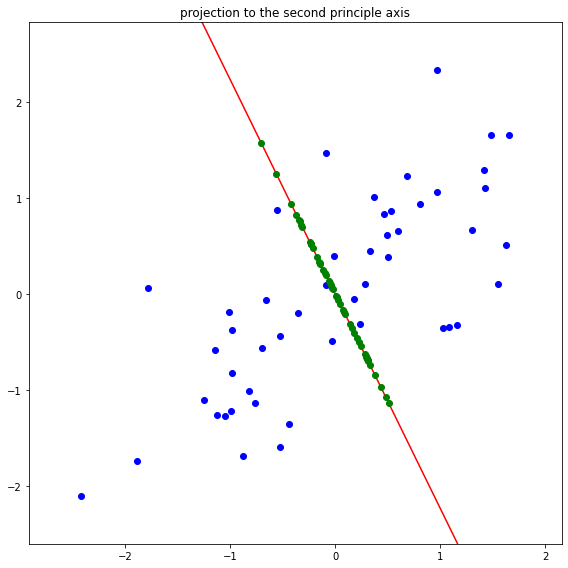

***

### 7. plot the projection line in grey onto the first principal axis

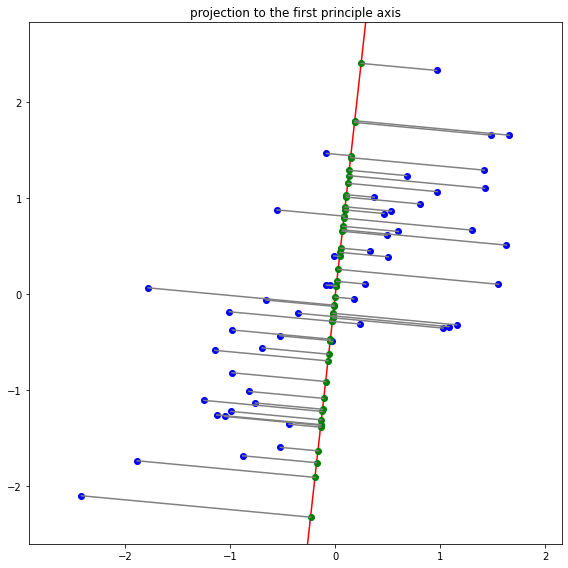

***

### 8. plot the projection line in grey onto the second principal axis

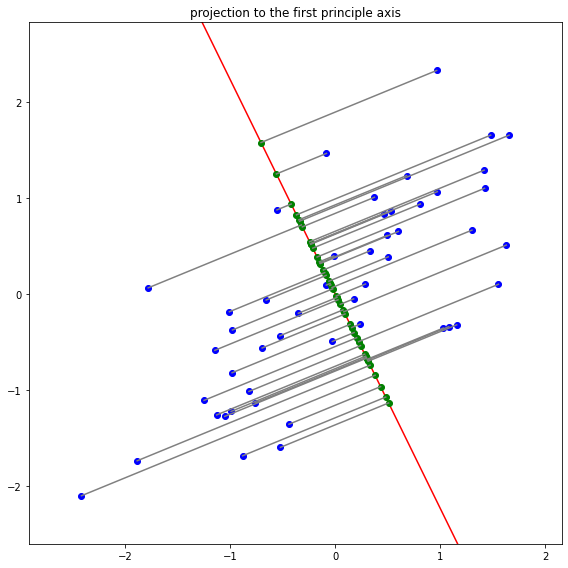

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***